In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import importlib
import numpy.linalg as linalg


def create_symmetric_matrix(n=5, loc=0, scale=1):
    """
    crée une matrice de taille n centrée en loc et d'écart-type scale
    """
    mat_init = stats.norm.rvs(loc=loc, scale=scale, size=(n, n))
    # on sélectionne les éléments au dessus de la diagonale principale
    upper_triangle = np.triu(mat_init, k=1)
    # On fait les éléments du dessous en prenant la transposée de la matrice diagonale supérieure
    lower_triangle = np.transpose(upper_triangle)
    # on sélectionne la diagonale, ATTENTION, on doit l'utiliser deux fois pour refaire une matrice nxn
    diagonale = np.diag(np.diag(mat_init))
    # On a une matrice symétrique réelle en additionnant les trois matrices précédentes
    return upper_triangle + lower_triangle + diagonale


# Programme principal
if __name__ == "__main__":
    # question 1
    matrix = create_symmetric_matrix(n=4, loc=0, scale=1)
    print("Matrice symmétrique")
    print(matrix)
    # question 2
    # Ici, il est préférable d'utiliser la version eigh à eig car la matrice est symmétrique réelle
    eigval, eigvec = linalg.eigh(matrix)
    # En fait, la diagonale et une des moitié de la matrice est suffisante
    # et il est inutile de donner explicitement une matrice symmétrique
    # eigval2,eigvec2 = linalg.eigh(np.triu(matrix, k=0),UPLO='U')

    # valeurs propres
    print("valeurs propres")
    print(eigval)
    # vecteurs propres
    print("vecteurs propres")
    print(eigvec)

    # question3
    passage_inv = linalg.inv(eigvec)
    print("inverse de la matrice de passage")
    print(passage_inv)
    # C'est aussi juste la transposée pour une matrice unitaire !
    # print(np.transpose(eigvec))

    # Question 4
    # calcul de P^-1 A P qui doit donner la matrice diagonale

    print("matrice dans la base des vecteurs propres")
    print(np.dot(np.dot(passage_inv, matrix), eigvec))

    # Question 5
    print("norme des vecteurs propres")
    print(linalg.norm(eigvec, axis=0))

Matrice symmétrique
[[ 1.86185981  0.88375528 -0.13881558  1.09983757]
 [ 0.88375528  0.04899511 -1.9394643  -0.03566872]
 [-0.13881558 -1.9394643  -1.36757158  0.83350416]
 [ 1.09983757 -0.03566872  0.83350416 -0.05659368]]
valeurs propres
[-2.88538636 -0.77988653  1.4742249   2.67773766]
vecteurs propres
[[ 0.02551165 -0.46398604  0.23750631  0.85302805]
 [-0.54088983  0.39154539 -0.62565242  0.4033478 ]
 [-0.81081952 -0.05866094  0.55898599 -0.16329499]
 [ 0.22216896  0.79244435  0.4895758   0.28807714]]
valeurs propres
[-2.88538636 -0.77988653  1.4742249   2.67773766]
vecteurs propres
[[ 0.02551165 -0.46398604 -0.23750631 -0.85302805]
 [-0.54088983  0.39154539  0.62565242 -0.4033478 ]
 [-0.81081952 -0.05866094 -0.55898599  0.16329499]
 [ 0.22216896  0.79244435 -0.4895758  -0.28807714]]
inverse de la matrice de passage
[[ 0.02551165 -0.54088983 -0.81081952  0.22216896]
 [-0.46398604  0.39154539 -0.05866094  0.79244435]
 [ 0.23750631 -0.62565242  0.55898599  0.4895758 ]
 [ 0.85302805

[-0.29124612 -0.11124612  0.11124612  0.29124612]


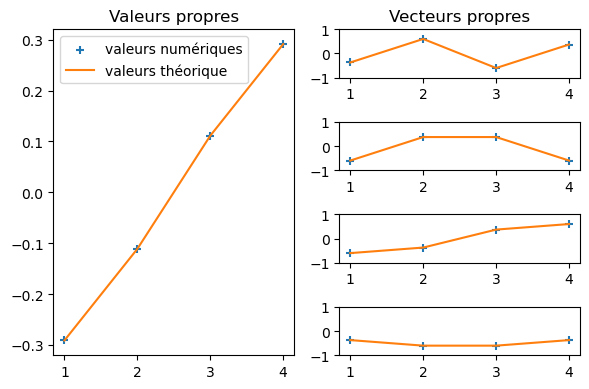

In [44]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
import numpy.linalg as linalg


def create_Hn(n=5, alpha=0, beta=-0.18):
    """
    Créer le hamiltonien pour un polyène linéaire de longueur n dans l'approximation de Hückel
    n : nombre de carbones
    alpha : paramètre énergétique pour la position des niveaux
    beta : paramètre énergétique pour quantifier la force des liaisons en electron volt.
    retourne le hamiltonien Hn sous forme de matrice carrée n n
    """
    # Initialisation de la matrice
    Hn = np.zeros((n, n))
    # Création de la matrice diagonale supérieur contenant beta
    updiag = np.diagflat(np.ones(n - 1) * beta, k=1)
    lowdiag = np.diagflat(np.ones(n - 1) * beta, k=-1)

    Hn += updiag + lowdiag
    # On a une matrice symétrique réelle en additionnant les trois matrices précédentes
    return Hn


def eigenvals(n=5, alpha=0, beta=-0.18):
    """
    Valeurs propres calculées analytiquement avec la formule de Coulson
    n : nombre de carbones
    alpha : paramètre énergétique pour la position des niveaux
    beta : paramètre énergétique pour quantifier la force des liaisons en electron volt.
    retourne les valeurs propres sous forme de tableau 1D
    """
    return alpha + 2 * beta * np.cos(np.arange(1, n + 1) / (n + 1) * np.pi)


def eigenvecs(n=5, alpha=0, beta=-0.18):
    """
    Vecteurs propres calculées analytiquement avec la formule de Coulson
    n : nombre de carbones
    alpha : paramètre énergétique pour la position des niveaux
    beta : paramètre énergétique pour quantifier la force des liaisons en electron volt.
    retourne les vecteurs propres sous forme de tableau 2D avec les vecteurs propres en ligne
    """
    eigs = np.zeros((n, n))
    # indice des atomes en colonne pour avoir le coefficient de chaque atome correspondant
    jcol = np.arange(1, n + 1)
    jcol = np.expand_dims(jcol, axis=-1)
    jcol = np.transpose(jcol)
    # ou de manière équivalente en changeant l'ordre des opérations :
    # jcol = np.expand_dims(np.transpose(np.arange(1,n+1)),axis=0)

    # indice des vecteurs propres en ligne pour calculer les vecteurs propres par ordre croissant
    ilig = np.arange(1, n + 1)
    ilig = np.expand_dims(ilig, axis=-1)
    # le signe - est là pour correspondre à la phase des orbitales trouvées numériquement
    eigs = -np.sqrt(2 / (n + 1)) * np.sin(jcol * ilig / (n + 1) * np.pi)
    # Chaque colonne correspond à un vecteur propre, ces vecteurs propres étant classés par ordre croissant d'énergie
    return eigs


# Programme principal
if __name__ == "__main__":
    # nombres de carbones
    n = 4
    # création du hamiltonien
    Hn = create_Hn(n)
    # diagonalisation
    eigvals, eigvecs = linalg.eigh(Hn)
    print(eigvals)
    fig = plt.figure(figsize=(6, 4))
    # ajout d'une grille
    gs = fig.add_gridspec(n, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    # tracé des valeurs propres
    indice_vecteur_propre = np.arange(1, n + 1, 1)
    ax1.scatter(indice_vecteur_propre, eigvals, marker="+", label="valeurs numériques")
    ax1.plot(indice_vecteur_propre, eigenvals(n), label="valeurs théorique", color="C1")
    ax1.set_title("Valeurs propres")

    # Calcul des vecteurs propres
    eigtheo = eigenvecs(n)
    # tracé des vecteurs propres : orbitales moléculaires
    for i in np.arange(0, n):
        axi = fig.add_subplot(gs[n - 1 - i, 1])
        if i == n - 1:
            axi.set_title("Vecteurs propres")
        # Tracé des vecteurs propres trouvés numériquement
        axi.scatter(np.arange(1, n + 1), eigvecs[i], marker="+")
        # on sélectionne la colonne correspondant au vecteur propre correspondant dans la matrice des vecteurs propres théoriques
        axi.plot(np.arange(1, n + 1), eigtheo[:, i], color="C1")
        axi.set_ylim(-1, 1)
    ax1.legend()
    plt.tight_layout()
    plt.savefig("huckel.svg")
    plt.show()